In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

# Drops the objects columns from the dataset
X = df.drop(['class', 'ID'], axis='columns')

# H: healthy patients
# P: patients with Alzheimer
y = df['class'].map({'P': 1, 'H': 0})

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().set_output(transform="pandas").fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,-0.039958,0.819201,-0.964281,-1.021048,-0.621190,-0.331301,-0.143336,0.583446,-1.097797,-0.210827,...,0.446195,-0.110468,1.905814,0.750685,0.368053,-0.541445,-0.157047,0.370324,2.347146,-0.039552
1,3.670803,1.863195,-0.994191,-1.051635,-0.172774,-0.149357,-0.377846,-0.541698,-1.131393,-0.371903,...,-2.266524,-1.589980,-0.657467,-1.874750,-2.259487,1.574847,4.390919,-0.386182,2.040903,0.271310
2,-0.242853,0.162976,-0.369289,-0.249241,0.216015,-0.697480,-0.077097,0.023550,-0.360783,-0.044734,...,-0.435581,0.482173,-1.159080,-0.315186,-0.563403,-0.431982,0.124509,-0.613046,-0.329030,-0.171900
3,-0.280104,0.162976,0.391119,-0.155526,-0.135051,0.382725,0.369034,-0.237507,0.205663,0.306488,...,-0.916895,-0.554289,-0.031154,-0.177609,-1.479491,1.355920,1.304574,-0.506614,1.184202,0.034342
4,-0.265837,-0.863121,-0.216284,-0.801634,-0.602937,-1.187857,-0.394751,-0.538220,-0.487082,-0.402728,...,-1.168098,-0.427298,0.394214,-0.770566,-1.400574,0.224798,-0.305967,0.656282,-0.084184,-0.184917


In [3]:
# Constants used for all the experimentations
TEST_SIZE = 0.2
RANDOM_STATE = 42

# Used for random forest
N_ESTIMATORS = 100
MAX_DEPTH = 5
CRITERION = 'entropy'
CLASS_WEIGHT = {0: 1, 1: 2}

<Axes: xlabel='entropy', ylabel='feature'>

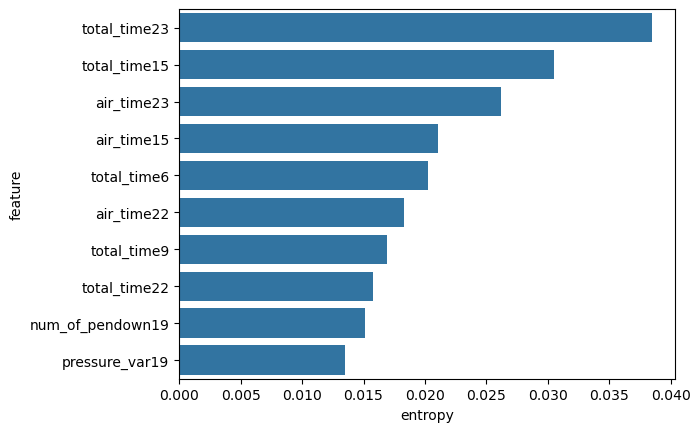

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

forest = RandomForestClassifier(n_estimators=100,
                                random_state=RANDOM_STATE,
                                criterion=CRITERION,
                                max_depth=MAX_DEPTH,
                                class_weight=CLASS_WEIGHT)
forest.fit(X_train, y_train)

## Random Forest Feature Importance

In [ ]:
feature_imp_df = pd.DataFrame({'feature': X_scaled.columns, f"{CRITERION}": forest.feature_importances_}).sort_values(f"{CRITERION}", ascending=False)

cols = X.columns.tolist()
ordered = feature_imp_df['feature'].tolist()
new = [ item for item in ordered if item in cols]
ft_importance_df = X_scaled[new].iloc[:, :10]
ft_importance_df.head()

sns.barplot(x=f"{CRITERION}", y='feature', data=feature_imp_df[:10], orient='h')

,total_time23,total_time15,air_time23,air_time15,total_time6,air_time22,total_time9,total_time22,num_of_pendown19,pressure_var19
0,0.071836,-0.045496,0.104690,-0.214422,-0.350925,-0.024871,-0.593404,-0.034986,-0.357807,0.334097
1,0.659730,0.137499,0.269100,-0.010120,1.292099,0.022856,0.299722,0.105154,2.142791,1.784214
2,-0.026361,-0.018283,-0.057051,-0.103359,-0.521791,-0.076620,-0.417679,-0.081878,-0.421925,0.427121
3,-0.038341,-0.126843,-0.062613,-0.113484,1.284033,-0.062642,0.886182,-0.053778,1.886319,1.933614
4,-0.185528,-0.212052,-0.145597,-0.187252,-0.043293,-0.109243,-0.357113,-0.118418,0.283372,0.029860


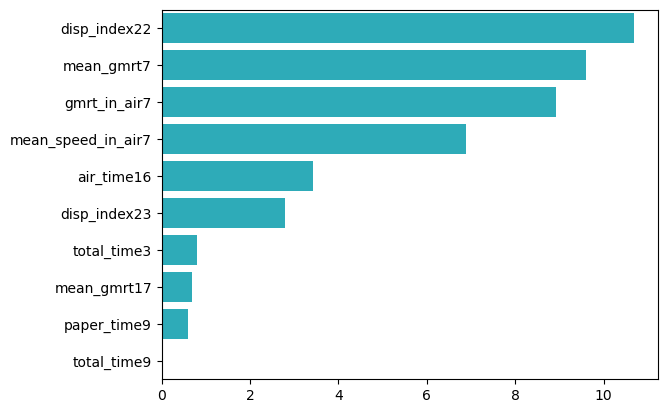

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

columns = X_scaled.columns[selector.get_support()]
feature_scores = list(zip(selector.scores_,columns))
sorted_feature_scores = sorted(feature_scores,reverse=True)

num_list = []
col_list = []
for i in range(10):
   num_list.append((sorted_feature_scores[i])[0])
   col_list.append((sorted_feature_scores [i])[1])

   sns.barplot(x=num_list, y=col_list, orient='h')

In [24]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_selector = SequentialFeatureSelector(knn, n_features_to_select=10, scoring='accuracy')
# Fit the selector to the data
knn_selector.fit(X_scaled, y)
# Get the selected features
selected_features_knn = knn_selector.get_support()

In [26]:
regressor = LogisticRegression()
reg_selector = SequentialFeatureSelector(regressor, n_features_to_select=10, scoring='accuracy')
reg_selector.fit(X_scaled, y)
selected_features_reg = reg_selector.get_support()

In [27]:
ensemble = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
ensemble_selector = SequentialFeatureSelector(ensemble, n_features_to_select=10, scoring='accuracy')
ensemble_selector.fit(X_scaled, y)
selected_features_ensemble = ensemble_selector.get_support()

In [29]:
print('The selected features using ensemble:', list(X_scaled.columns[selected_features_knn]))
print('The selected features using knn:', list(X_scaled.columns[selected_features_reg]))
print('The selected features using regressor:', list(X_scaled.columns[selected_features_ensemble]))

The selected features using ensemble: ['air_time1', 'max_x_extension3', 'total_time6', 'air_time8', 'total_time9', 'mean_gmrt11', 'air_time17', 'total_time17', 'air_time23', 'total_time23']
The selected features using knn: ['air_time1', 'max_y_extension1', 'air_time4', 'mean_acc_in_air5', 'paper_time6', 'num_of_pendown7', 'air_time15', 'mean_jerk_on_paper16', 'mean_speed_in_air16', 'total_time17']
The selected features using regressor: ['max_y_extension2', 'gmrt_on_paper3', 'total_time5', 'air_time9', 'disp_index9', 'total_time13', 'total_time15', 'mean_jerk_in_air19', 'mean_jerk_on_paper19', 'paper_time19']


In [39]:
from collections import Counter

selected_fts = list(list(X_scaled.columns[selected_features_knn]) + list(X_scaled.columns[selected_features_reg]) + list(X_scaled.columns[selected_features_ensemble]))

selected_fts = Counter(selected_fts)
selected_fts = {key: value for key, value in selected_fts.items() if value >= 2}
selected_fts

{'air_time1': 2, 'total_time17': 2}